# ASSIGNED adiabatic coupling in a PFR

Butadiene and ethylene react to form cyclohexene according to:
$B + E \rightarrow C$
If equimolar butadiene and ethylene at 723 K and a total pressure of 1 atm and inlet volumetric flow of 20 L/s are fed to an adiabatic PFR. What space time is required to reach a fractional conversion of 0.10, and what is the exit temperature?
The following data is given.

-   k = 10<sup>7.5</sup> e<sup>-27500/(R T)</sup>  L/mol/s
-   &Delta; H\_r = -30000 cal/mol (at 723 K)
-   CpB = 36.8 cal/mol/K
-   CpE = 20.2 cal/mol/K
-   CpC = 59.5 cal/mol/K

The space time is defined as $\tau = V / v0$.

## Solution

Some other important points:

1.  account for changing volumetric flow
2.  account for change in reaction energy with temperature.

I use an event to solve this problem. There are many other approaches that could also work.

In [1]:
import numpy as np
from pycse import odelay
%matplotlib inline
import matplotlib.pyplot as plt

R = 1.987  # cal/mol/K
T0 = 723  # K

v0 = 20  # L / s

Ratm = 0.082057
Cb0 = Ce0 = 0.5 / Ratm / T0

Fb0 = v0 * Cb0
Fe0 = v0 * Ce0
Fc0 = 0.0

Ft0 = Fb0 + Fe0 + Fc0

CpB = 36.8  # cal/mol/K
CpE = 20.2  # cal/mol/K
CpC = 59.5  # cal/mol/K

dCp = CpC - CpE - CpB

Hrxn_723 = -30000.0  # cal / mol

Here is the ODE setup.

In [2]:
def ode(Y, V):
    Fb, Fe, Fc, T = Y

    # first take care of mole balances
    Ft = Fb + Fe + Fc
    v = v0 * Ft / Ft0 * T / T0

    Cb = Fb / v
    Ce = Fe / v

    k = 10**7.5 * np.exp(-27500 / R / T)
    r = k * Cb * Ce

    dFbdV = -r
    dFedV = -r
    dFcdV = r

    # Now the energy balance
    Hrxn = Hrxn_723 + dCp * (T - 723)
    dTdV = (-Hrxn * r) / (Fb * CpB + Fe * CpE + Fc * CpC)
    return [dFbdV, dFedV, dFcdV, dTdV]


def event(Y, V):
    Fb, Fe, Fc, T = Y
    value = 0.1 - (Fb0 - Fb)/Fb0
    isterminal = True
    direction = 0
    return value, isterminal, direction

Vspan = np.linspace(0, 1500)
init = [Fb0, Fe0, Fc0, 723]

Here is the solution.

A 	au of 47.12 s achieves a conversion of 0.1
Texit = 775.4017436167768 K


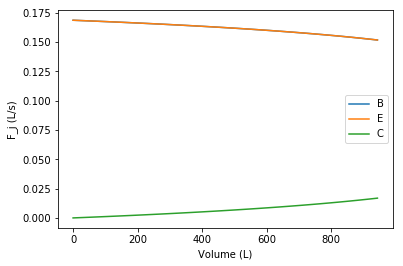

In [5]:
V, Y, XE, YE, IE = odelay(ode, init, Vspan, events=[event])

if len(XE) != 1:
    raise Exception('we did not find just one event: %s', XE)
print('A \tau of {0:1.2f} s achieves a conversion of 0.1'.format(V[-1] / v0))
print('Texit = {} K'.format(Y[-1, -1]))

plt.plot(V, Y[:, 0:3])
plt.xlabel('Volume (L)')
plt.ylabel('F_j (L/s)')
plt.legend(['B', 'E', 'C'], loc='best')